In [1]:
import numpy as np
import numpy.random as nr
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
def make_dist(mean, cov, dist_num, n = 100, seed = 123):
    nr.seed(seed)
    sample = nr.multivariate_normal(mean, cov, n) # Compute the 2-d Normally distributed data
    sample = np.column_stack((sample, np.array([dist_num]*n))) ## Add the distribution identifier
    print('Shape of sample = ' + str(sample.shape))
    return(sample)

In [6]:
nr.seed(3344)
cov = np.array([[1.0, -0.98], [-0.98, 1.0]])
mean = np.array([-1.0, 0.0])
sample1 = make_dist(mean, cov, 1, 100, 3344)

nr.seed(5566)
cov = np.array([[1.0, -0.8], [-0.8, 1.0]])
mean = np.array([6.0, 0.0])
sample2 = make_dist(mean, cov, 1, 100, 6677)

nr.seed(7777)
cov = np.array([[1.0, 0.9], [0.9, 1.0]])
mean = np.array([-4.0, 0.0])
sample3= make_dist(mean, cov, 3, 100, 367)

Shape of sample = (100, 3)
Shape of sample = (100, 3)
Shape of sample = (100, 3)


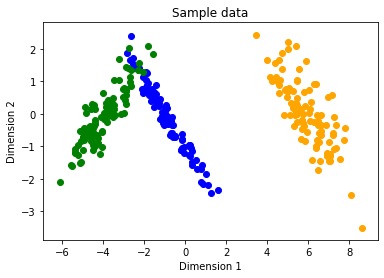

In [7]:
def plot_dat(sample1, sample2, sample3):
    plt.scatter(sample1[:,0], sample1[:,1], color = 'blue')
    plt.scatter(sample2[:,0], sample2[:,1], color = 'orange')
    plt.scatter(sample3[:,0], sample3[:,1], color = 'green')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Sample data')
    plt.show()
    
plot_dat(sample1, sample2, sample3)  

Concatenate the three distributions into a single numpy array

In [9]:
sample_2 = np.concatenate((sample1, sample2, sample3))

for i in range(1):
    mean_col = np.mean(sample_2[:,i])
    std_col = np.std(sample_2[:,i])
    sample_2[:,i] = [(x - mean_col)/std_col for x in sample_2[:,i]]

sample_2.shape

(300, 3)

Next, you will create a K-means clustering model by the following steps in the code below:
A K-means clustering model is defined with K = 3

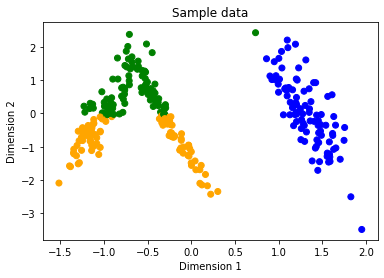

0.3813615556878559


In [14]:
nr.seed(3344)
kmeans_3 = KMeans(n_clusters=3, random_state=0)
assignments_km3 = kmeans_3.fit_predict(sample_2[:,0:2])
plot_clusters(sample_2, assignments_km3)
print(silhouette_score(sample_2[:,0:1], assignments_km3))

Next, execute the code in the cell below to compute and display the assignments for an agglomerative clustering model with 5 clusters.

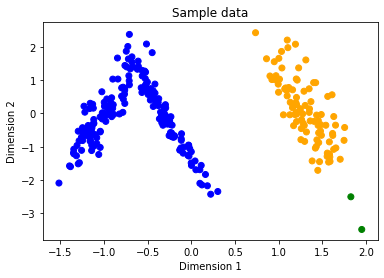

In [13]:
nr.seed(5555)
agglomerative3_a = AgglomerativeClustering(n_clusters=3, linkage = 'average')
assignments3_a = agglomerative3_a.fit_predict(sample_2[:,0:2])
plot_clusters(sample_2, assignments3_a)

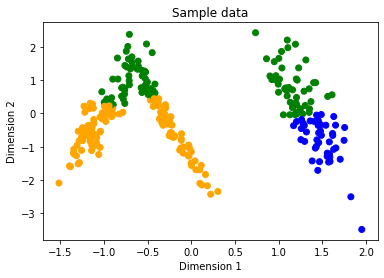

In [15]:
nr.seed(987)
agglomerative3_c = AgglomerativeClustering(n_clusters=3, linkage = 'complete')
assignments3_c = agglomerative3_c.fit_predict(sample_2[:,0:2])
plot_clusters(sample_2, assignments3_c)